### K-means clustering (algorytm centroidów)

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load data
df = pd.read_parquet('./IDS2017/Final/Combined.parquet')
print(df.columns)

# Encodowanie Label i rozdzielenie od reszty danych
X = df.drop('Label', axis=1)

# Scale (polecało zrobić)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Index(['Label', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Average Packet Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes'],
      dtype='object')


Cluster Counts:
0    1075900
1     260324
Name: Cluster, dtype: int64


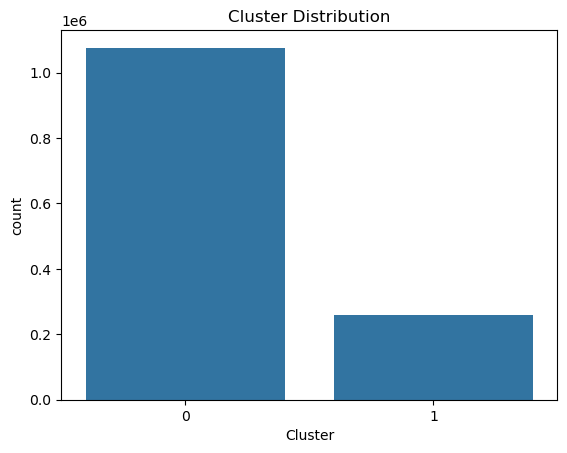

In [35]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Analyze the clusters
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Plotting
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.show()

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize cluster distributions if needed
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.show()